<div style="display: flex; align-items: center; justify-content: center; gap: 20px;">
  <div>
    <h1 style="font-weight: bold; color: #4B0082;">Zomato Project</h1>
    <p style="font-style: italic; color: #800080;">
      Analyzing restaurant ratings, customer preferences, and service trends using Zomato data.
    </p>
  </div>
  <div>
    <img src="https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExcXFvOHp5eDg5c3p1YXB1bnlhYXQzOXZueTVneTR6aGhkd2RjbXFzMSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/gACu73U4S2BPws20b0/giphy.gif" alt="Zomato GIF" style="width: 200px; height: auto; border-radius: 8px;">
  </div>
</div>


In [1]:
# تحديث النظام + تثبيت Google Chrome
!apt-get update -qq
!apt-get install -y google-chrome-stable

# تثبيت الإصدارات المناسبة من plotly و kaleido
!pip install -U plotly==6.1.1 kaleido==0.2.1

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package google-chrome-stable


In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

# 👈 فتح الملف بالـ safe mode (مع معالجة الترميز)

with open(r"/content/zomato.csv", "r", encoding="latin1", errors="replace") as f:
    df = pd.read_csv(f)

# 👈 ناخد عينة (عشان الملف كبير)
df_sample = df.sample(n=10000, random_state=42) if len(df) > 10000 else df

# 👈 نعمل تقرير
profile = ProfileReport(df_sample, progress_bar=True, title="Zomato Dataset Profiling")

# لو في Jupyter Notebook
profile.to_notebook_iframe()

# أو نحفظه كـ HTML ونفتحه في المتصفح
# profile.to_file("zomato_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:02<00:00,  7.71it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df.sample()

Restaurant ID       Restaurant Name  Country Code      City  \
449       17616368  Lulu's Chocolate Bar           216  Savannah   

                                 Address  Locality    Locality Verbose  \
449  42 MLK Jr. Blvd, Savannah, GA 31401  Savannah  Savannah, Savannah   

     Longitude   Latitude                  Cuisines  ...   Currency  \
449 -81.097051  32.080742  Coffee and Tea, Desserts  ...  Dollar($)   

    Has Table booking Has Online delivery Is delivering now  \
449                No                  No                No   

    Switch to order menu Price range  Aggregate rating  Rating color  \
449                   No           1               4.3         Green   

    Rating text Votes  
449   Very Good   456  

[1 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [6]:
# تعديل أسماء الأعمدة
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
all(column == column.lower() for column in df.columns)

True

In [8]:
round(df.isnull().mean()*100, 3)

restaurant_id           0.000
restaurant_name         0.000
country_code            0.000
city                    0.000
address                 0.000
locality                0.000
locality_verbose        0.000
longitude               0.000
latitude                0.000
cuisines                0.094
average_cost_for_two    0.000
currency                0.000
has_table_booking       0.000
has_online_delivery     0.000
is_delivering_now       0.000
switch_to_order_menu    0.000
price_range             0.000
aggregate_rating        0.000
rating_color            0.000
rating_text             0.000
votes                   0.000
dtype: float64

In [9]:
df= df.dropna(subset=["cuisines"])

In [10]:
round(df["cuisines"].isnull().mean()*100, 3)

np.float64(0.0)

In [11]:
drop_cols = [
    "restaurant_id",
    "restaurant_name",
    "address",
    "locality_verbose",
    "switch_to_order menu",
    "rating_color"
]

df = df.drop(columns=drop_cols, errors="ignore")

In [12]:
df.sample()

country_code       city            locality  longitude   latitude  \
6450             1  New Delhi  PVR Anupam Complex  77.207552  28.523269   

              cuisines  average_cost_for_two            currency  \
6450  Pizza, Fast Food                   700  Indian Rupees(Rs.)   

     has_table_booking has_online_delivery is_delivering_now  \
6450                No                  No                No   

     switch_to_order_menu  price_range  aggregate_rating rating_text  votes  
6450                   No            2               2.5     Average    253

In [13]:
df.columns

Index(['country_code', 'city', 'locality', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_text', 'votes'],
      dtype='object')

In [14]:
df['country_code'].value_counts().sort_index().sort_values(ascending=False)

country_code
1      8652
216     425
215      80
214      60
189      60
30       60
148      40
208      34
14       24
162      22
94       21
166      20
191      20
184      20
37        4
Name: count, dtype: int64

In [15]:
# mapping للأكواد الخاصة بـ Zomato
country_mapping = {
    1: 'India',
    14: 'Australia',
    30: 'Brazil',
    37: 'Canada',
    94: 'Indonesia',
    148: 'New Zealand',
    162: 'Philippines',
    166: 'Qatar',
    184: 'Singapore',
    189: 'South Africa',
    191: 'Sri Lanka',
    208: 'Turkey',
    214: 'UAE',
    215: 'England',
    216: 'USA'
}

# إنشاء عمود country بدل الكود
df['country'] = df['country_code'].map(country_mapping)

In [16]:
df.drop('country_code', axis=1, inplace=True)

# 📌 Market & Expansion Strategy


In [19]:
import plotly.express as px
from IPython.display import Image, display


%matplotlib inline
import pandas as pd
import plotly.express as px
from IPython.display import display, HTML

# -------------------------
# تحضير البيانات
# -------------------------
top_countries = df['country'].value_counts().nlargest(10)
top_cities = df['city'].value_counts().nlargest(10)

table = pd.DataFrame({
    'Top Countries': top_countries.index.str.title(),
    'Restaurants (Countries)': top_countries.values,
    'Top Cities': top_cities.index.str.title(),
    'Restaurants (Cities)': top_cities.values
})

# -------------------------
# جدول HTML styled
# -------------------------
max_country = table['Restaurants (Countries)'].max()
max_city = table['Restaurants (Cities)'].max()

styled_table = table.style \
    .bar(subset=['Restaurants (Countries)'], color='#69b3a2', vmin=0, vmax=max_country) \
    .bar(subset=['Restaurants (Cities)'], color='#4374B3', vmin=0, vmax=max_city) \
    .set_properties(**{'color': 'black', 'font-weight': 'bold',
                       'width': '350px', 'height': '40px', 'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '14pt'), ('text-align', 'center')]}
    ]) \
    .hide(axis="index").to_html()

# -------------------------
# عرض الجدول بجانب GIF
# -------------------------
gif_url = "https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3ZXh4Y3YybHI1MGtvdWg3Mmp4MnRvYWRweTYxMzFyNmY5ejR0Z2s5cCZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/AbLHuwSThGPiRaRpGz/giphy.gif"

display(HTML(f"""
<div style="display:flex; align-items:flex-start; gap:30px;">
    <div style="max-height:400px; overflow-y:auto;">{styled_table}</div>
    <div style="text-align:center;">
        <h3 style="color:#4374B3; font-family:Arial;">
            Top Countries and Cities by Number of Restaurants
        </h3>
        <img src="{gif_url}" width="300">
    </div>
</div>
"""))

# -------------------------
# إنشاء Choropleth Map ثابت
# -------------------------
fig_map = px.choropleth(
    table,
    locations='Top Countries',
    locationmode='country names',
    color='Restaurants (Countries)',
    hover_name='Top Countries',
    color_continuous_scale=['#69b3a2', '#4374B3'],  # أخضر وأزرق
    title='Top Countries by Number of Restaurants'
)

fig_map.update_layout(
    height=600,
    width=1100,
    title_font=dict(size=20, color='black', family='Arial')
)

fig_map.show()

# 3️⃣ خزّن نسخة صورة (PNG)
fig_map.write_image("plot.png")

# 4️⃣ اعرض الصورة جوه النوتبوك → عشان تبان في GitHub
display(Image("plot.png"))


In [20]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import plotly.express as px
from IPython.display import display, HTML

# -------------------------
# تحضير البيانات وعرض أعلى 5 مأكولات لكل دولة
# -------------------------
top_cuisines = (
    df.groupby(['country','cuisines'])
      .size()
      .reset_index(name='count')
      .sort_values(['country','count'], ascending=[True,False])
      .groupby('country')
      .head(5)
)

final_table = (
    top_cuisines.groupby('country')
                .apply(lambda x: ', '.join(x['cuisines'].str.title()))
                .reset_index(name='Top Cuisines')
                .merge(top_cuisines.groupby('country')['count'].sum().reset_index(name='Restaurants'), on='country')
)
final_table['Country'] = final_table['country'].str.title()
final_table = final_table[['Country','Top Cuisines','Restaurants']]

# -------------------------
# جدول HTML Scrollable بخمسة ألوان مع نصوص Bold وواضحة
# -------------------------
table_html = final_table.style.bar(subset=['Restaurants'], color='#800080')\
    .set_properties(**{
        'border':'2px solid #800080',
        'color':'#FF0000',   # أحمر للنصوص
        'font-weight':'bold',
        'text-align':'center',
        'font-size':'11pt',   # حجم أكبر للنصوص
        'padding':'4px 6px'
    })\
    .set_table_styles([
        {'selector':'th','props':[
            ('font-size','12pt'),
            ('background-color','#800080'),  # بنفسجي لرأس الجدول
            ('color','#FFA500'),             # برتقالي للنص في الرأس
            ('text-align','center'),
            ('padding','4px 6px'),
            ('font-weight','bold')
        ]}
    ])\
    .hide(axis="index").to_html()

# -------------------------
# عرض الجدول Scrollable + GIF + عنوان فوق الـ GIF
# -------------------------
gif_url = "https://media3.giphy.com/media/v1.Y2lkPTc5MGI3NjExbWw1dXozdmYwMmQ3MmN5czFuM2JtcnhvYTVtNmppMW13djAwaWh1cSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/61OQkHkQe8ZlQAQoNN/giphy.gif"

display(HTML(f"""
<div style="display:flex; align-items:flex-start; gap:30px;">
    <div style="max-height:300px; overflow-y:auto;">{table_html}</div>
    <div style="text-align:center;">
        <h3 style="color:#800080; font-family:Arial;">
            What are the most popular cuisines globally, and how do they vary by country?
        </h3>
        <img src="{gif_url}" width="300">
    </div>
</div>
"""))

# -------------------------
# Stacked Bar Plot بخمسة ألوان
# -------------------------
colors = ["#800080","#FF0000","#0000FF","#FFA500","#008000"]  # بنفسجي، أحمر، أزرق، برتقالي، أخضر
color_map = {cuisine: colors[i % len(colors)] for i,cuisine in enumerate(top_cuisines['cuisines'].unique())}

fig = px.bar(top_cuisines, x='country', y='count', color='cuisines', text='count',
             title='Top Cuisines per Country - Stacked Bar', height=600, color_discrete_map=color_map)
fig.update_traces(textfont=dict(size=12, color='black', family='Arial'))  # نصوص واضحة على الأعمدة
fig.update_yaxes(title='Number of Restaurants', type='log')
fig.update_xaxes(title='Country')
fig.update_layout(showlegend=True, title={'x':0.5,'xanchor':'center','yanchor':'top','font':{'size':40}}, legend_title_text='Cuisine')
fig.show()
# 3️⃣ خزّن نسخة صورة (PNG) عشان GitHub يعرضها
fig.write_image("plot.png")

# 4️⃣ اعرض الصورة كـ static image
display(Image("plot.png"))


In [21]:
import pandas as pd
from IPython.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px

# -------------------------
# أفضل cuisine لكل دولة
avg_rating_per_country = (
    df.groupby(['country','cuisines'])['aggregate_rating']
      .mean()
      .reset_index()
)

best_cuisine_per_country = avg_rating_per_country.loc[
    avg_rating_per_country.groupby('country')['aggregate_rating'].idxmax()
].sort_values('aggregate_rating', ascending=False)

best_cuisine_per_country = best_cuisine_per_country.rename(columns={
    'country':'Country',
    'cuisines':'Top Cuisine',
    'aggregate_rating':'Average Rating'
})

# -------------------------
# جدول HTML ملون
table_html = best_cuisine_per_country.style \
    .bar(subset=["Average Rating"], color='#90EE90', vmin=0, vmax=5) \
    .set_properties(**{
        'border': '1px solid #8B4513',
        'color': '#000000',
        'font-weight': 'bold',
        'text-align': 'center',
        'min-width':'150px'
    }) \
    .hide(axis="index") \
    .to_html()

# -------------------------
# رابط GIF
gif_url = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNDUwdHNwbWF5ejd0ajRoYncxbmN5dHNsenJjdDZjaGJ4azJjenRjNiZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/Cr242fZfxuSqlrWzVw/giphy.gif"

# -------------------------
# عرض الجدول + GIF
display(HTML(f"""
<div style="display:flex; align-items:flex-start; gap:20px;">
    <div style="flex:1; overflow-x:auto;">
        {table_html}
    </div>
    <div style="flex:1; text-align:center;">
        <h3 style="color:#8B4513; font-family:Arial;">
            Which cuisines achieve the highest average ratings in each country?
        </h3>
        <img src="{gif_url}" style="max-width:100%; height:auto;">
    </div>
</div>
"""))

# -------------------------
# إعداد ألوان لكل cuisine
cuisines = best_cuisine_per_country['Top Cuisine'].unique()
colors = px.colors.qualitative.Plotly  # قائمة ألوان جاهزة
color_map = {c: colors[i % len(colors)] for i, c in enumerate(cuisines)}

# -------------------------
# Lollipop Chart
fig = go.Figure()

for i, row in best_cuisine_per_country.iterrows():
    fig.add_trace(go.Scatter(
        x=[row['Country'], row['Country']],
        y=[0, row['Average Rating']],
        mode='lines+markers',
        marker=dict(color=color_map[row['Top Cuisine']], size=12),
        line=dict(color=color_map[row['Top Cuisine']], width=3),
        hovertemplate=f"Cuisine: {row['Top Cuisine']}<br>Rating: {row['Average Rating']:.2f}<extra></extra>"
    ))

fig.update_layout(
    title='Best Cuisine Average Rating per Country (Lollipop Chart)',
    xaxis_title='Country',
    yaxis_title='Average Rating',
    width=1000,
    height=500,
    showlegend=False
)

fig.show()

# 3️⃣ خزّن نسخة صورة (PNG) عشان GitHub يعرضها
fig.write_image("plot.png")

# 4️⃣ اعرض الصورة كـ static image
display(Image("plot.png"))


In [22]:
import pandas as pd
import plotly.express as px
from IPython.display import display, HTML

# -------------------------
# 1️⃣ تحديد الأسواق الأعلى أداءً (Top-performing markets)
top_countries = df['country'].value_counts().nlargest(16).index

# -------------------------
# 2️⃣ تصفية البيانات لهذه الدول
top_df = df[df['country'].isin(top_countries)]

# -------------------------
# 3️⃣ حساب متوسط تكلفة وجبتين لكل دولة
avg_cost_by_country = top_df.groupby('country')['average_cost_for_two'].mean().sort_values(ascending=False).reset_index()
avg_cost_by_country['country'] = avg_cost_by_country['country'].str.title()  # Capitalize

# -------------------------
# 4️⃣ عمل جدول HTML باللون البرتقالي الداكن وعريض
table_html = avg_cost_by_country.rename(
    columns={'country':'Country','average_cost_for_two':'Average Cost for Two'}
).style.bar(subset=['Average Cost for Two'], color='#FF8C00')\
 .set_properties(**{
     'color': 'black',
     'font-weight':'bold',
     'text-align':'center',
     'font-size':'12pt',
     'width':'80%'
 })\
 .set_table_styles([
     {'selector':'th','props':[
         ('font-size','14pt'),
         ('text-align','center'),
         ('background-color','#FF8C00'),
         ('color','white'),
         ('font-weight','bold')
     ]}
 ])\
 .hide(axis="index").to_html()

# -------------------------
# 5️⃣ عرض الجدول أعرض + GIF مع العنوان فوق GIF
gif_url = "https://media4.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3ZXh4Y3YybHI1MGtvdWg3Mmp4MnRvYWRweTYxMzFyNmY5ejR0Z2s5cCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9cw/3a9jT3a5VjHmgKXrGl/giphy.gif"

display(HTML(f"""
<div style="display:flex; align-items:flex-start; gap:30px;">
    <div style="flex:3; overflow-x:auto;">{table_html}</div>  <!-- flex أكبر يجعل الجدول أعرض -->
    <div style="flex:1; text-align:center;">
        <h2 style="color:#FF8C00; font-family:Arial; margin-bottom:10px;">
            What is the average cost for two in top-performing markets?
        </h2>
        <img src="{gif_url}" width="300">
    </div>
</div>
"""))

# -------------------------
# 6️⃣ رسم بياني Bar Chart بالبرتقالي الداكن نفسه
fig = px.bar(
    avg_cost_by_country,
    x='country',
    y='average_cost_for_two',
    text='average_cost_for_two',
    color_discrete_sequence=['#FF8C00'],  # نفس درجة البرتقالي الداكن للجدول
    title='Average Cost for Two in Top-Performing Markets'
)
fig.update_traces(texttemplate='$%{text:.2f}', textposition='outside')
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Average Cost for Two',
    showlegend=False,
    height=500
)
fig.show()

# 3️⃣ خزّن نسخة صورة (PNG) عشان GitHub يعرضها
fig.write_image("plot.png")

# 4️⃣ اعرض الصورة كـ static image
display(Image("plot.png"))


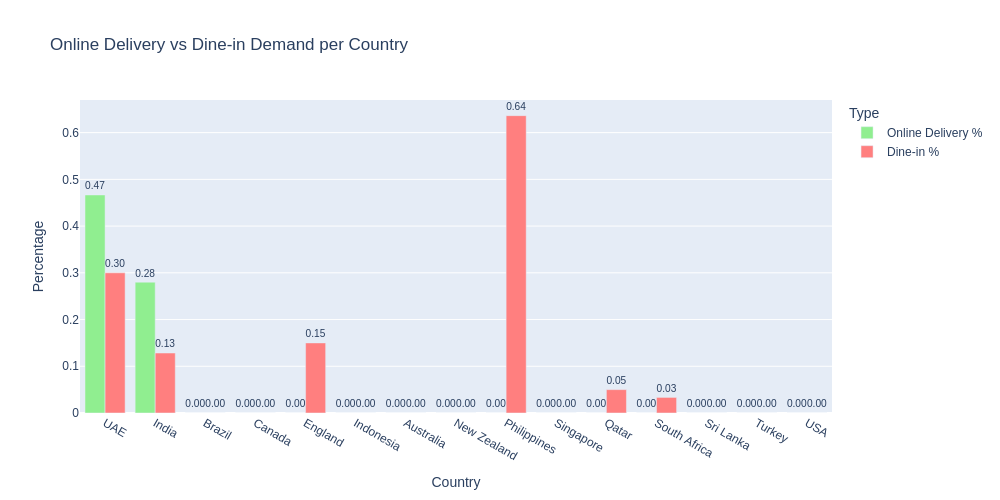

In [23]:
import pandas as pd
from IPython.display import display, HTML
import plotly.express as px

# -------------------------
# 1️⃣ تحويل Yes/No إلى أرقام
df['has_online_delivery_num'] = df['has_online_delivery'].map({'Yes':1, 'No':0})
df['has_table_booking_num'] = df['has_table_booking'].map({'Yes':1, 'No':0})

# -------------------------
# 2️⃣ حساب النسبة لكل دولة
online_vs_dinein = df.groupby('country').agg({
    'has_online_delivery_num':'mean',
    'has_table_booking_num':'mean'
}).reset_index()

online_vs_dinein = online_vs_dinein.rename(columns={
    'country':'Country',
    'has_online_delivery_num':'Online Delivery %',
    'has_table_booking_num':'Dine-in %'
})

# ترتيب حسب أعلى طلب للتوصيل أونلاين
online_vs_dinein = online_vs_dinein.sort_values('Online Delivery %', ascending=False)

# -------------------------
# 3️⃣ رابط GIF
gif_url = "https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3cDNwMWQxcHR4a3VxeGE3cnRsZHk1Znd6Mno5YzE0MnB3NXEwMXB5dyZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/saZ9FkLvroaQb0W9M9/giphy.gif"

# -------------------------
# 4️⃣ تحويل الجدول إلى HTML scrollable وملون
table_html = online_vs_dinein.style \
    .bar(subset=["Online Delivery %"], color='#90EE90', vmin=0, vmax=1) \
    .bar(subset=["Dine-in %"], color='#FF7F7F', vmin=0, vmax=1) \
    .set_properties(**{
        'border': '1px solid #8B4513',
        'color': '#000000',
        'font-weight': 'bold',
        'text-align': 'center',
        'min-width':'120px'
    }) \
    .set_table_styles([
        {'selector': 'th',
         'props': [('font-size', '13pt'),
                   ('background-color', '#8B4513'),
                   ('color', '#FFD700'),
                   ('text-align', 'center')]}
    ]) \
    .hide(axis="index") \
    .to_html()

# -------------------------
# 5️⃣ عرض الجدول + GIF مع عنوان فوق GIF
display(HTML(f"""
<div style="display:flex; align-items:flex-start; gap:20px;">
    <div style="flex:1; overflow-x:auto;">
        {table_html}
    </div>
    <div style="flex:1; text-align:center;">
        <h3 style="color:#8B4513; font-family:Arial;">
            Which countries show a high demand for online delivery vs. dine-in?
        </h3>
        <img src="{gif_url}" style="max-width:100%; height:auto;">
    </div>
</div>
"""))

# -------------------------
# 6️⃣ Melt البيانات لرسم Bar plot بألوان ثابتة
melted = online_vs_dinein.melt(
    id_vars='Country',
    value_vars=['Online Delivery %','Dine-in %'],
    var_name='Type', value_name='Percentage'
)

# -------------------------
# 7️⃣ رسم Bar plot
fig = px.bar(
    melted,
    x='Country',
    y='Percentage',
    color='Type',
    text='Percentage',
    barmode='group',
    color_discrete_map={'Online Delivery %':'#90EE90', 'Dine-in %':'#FF7F7F'},
    title='Online Delivery vs Dine-in Demand per Country'
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(width=1000, height=500)
fig.show()

# 3️⃣ خزّن نسخة صورة (PNG) عشان GitHub يعرضها
fig.write_image("plot.png")

# 4️⃣ اعرض الصورة كـ static image
display(Image("plot.png"))

# 📊 Customer Experience & Ratings



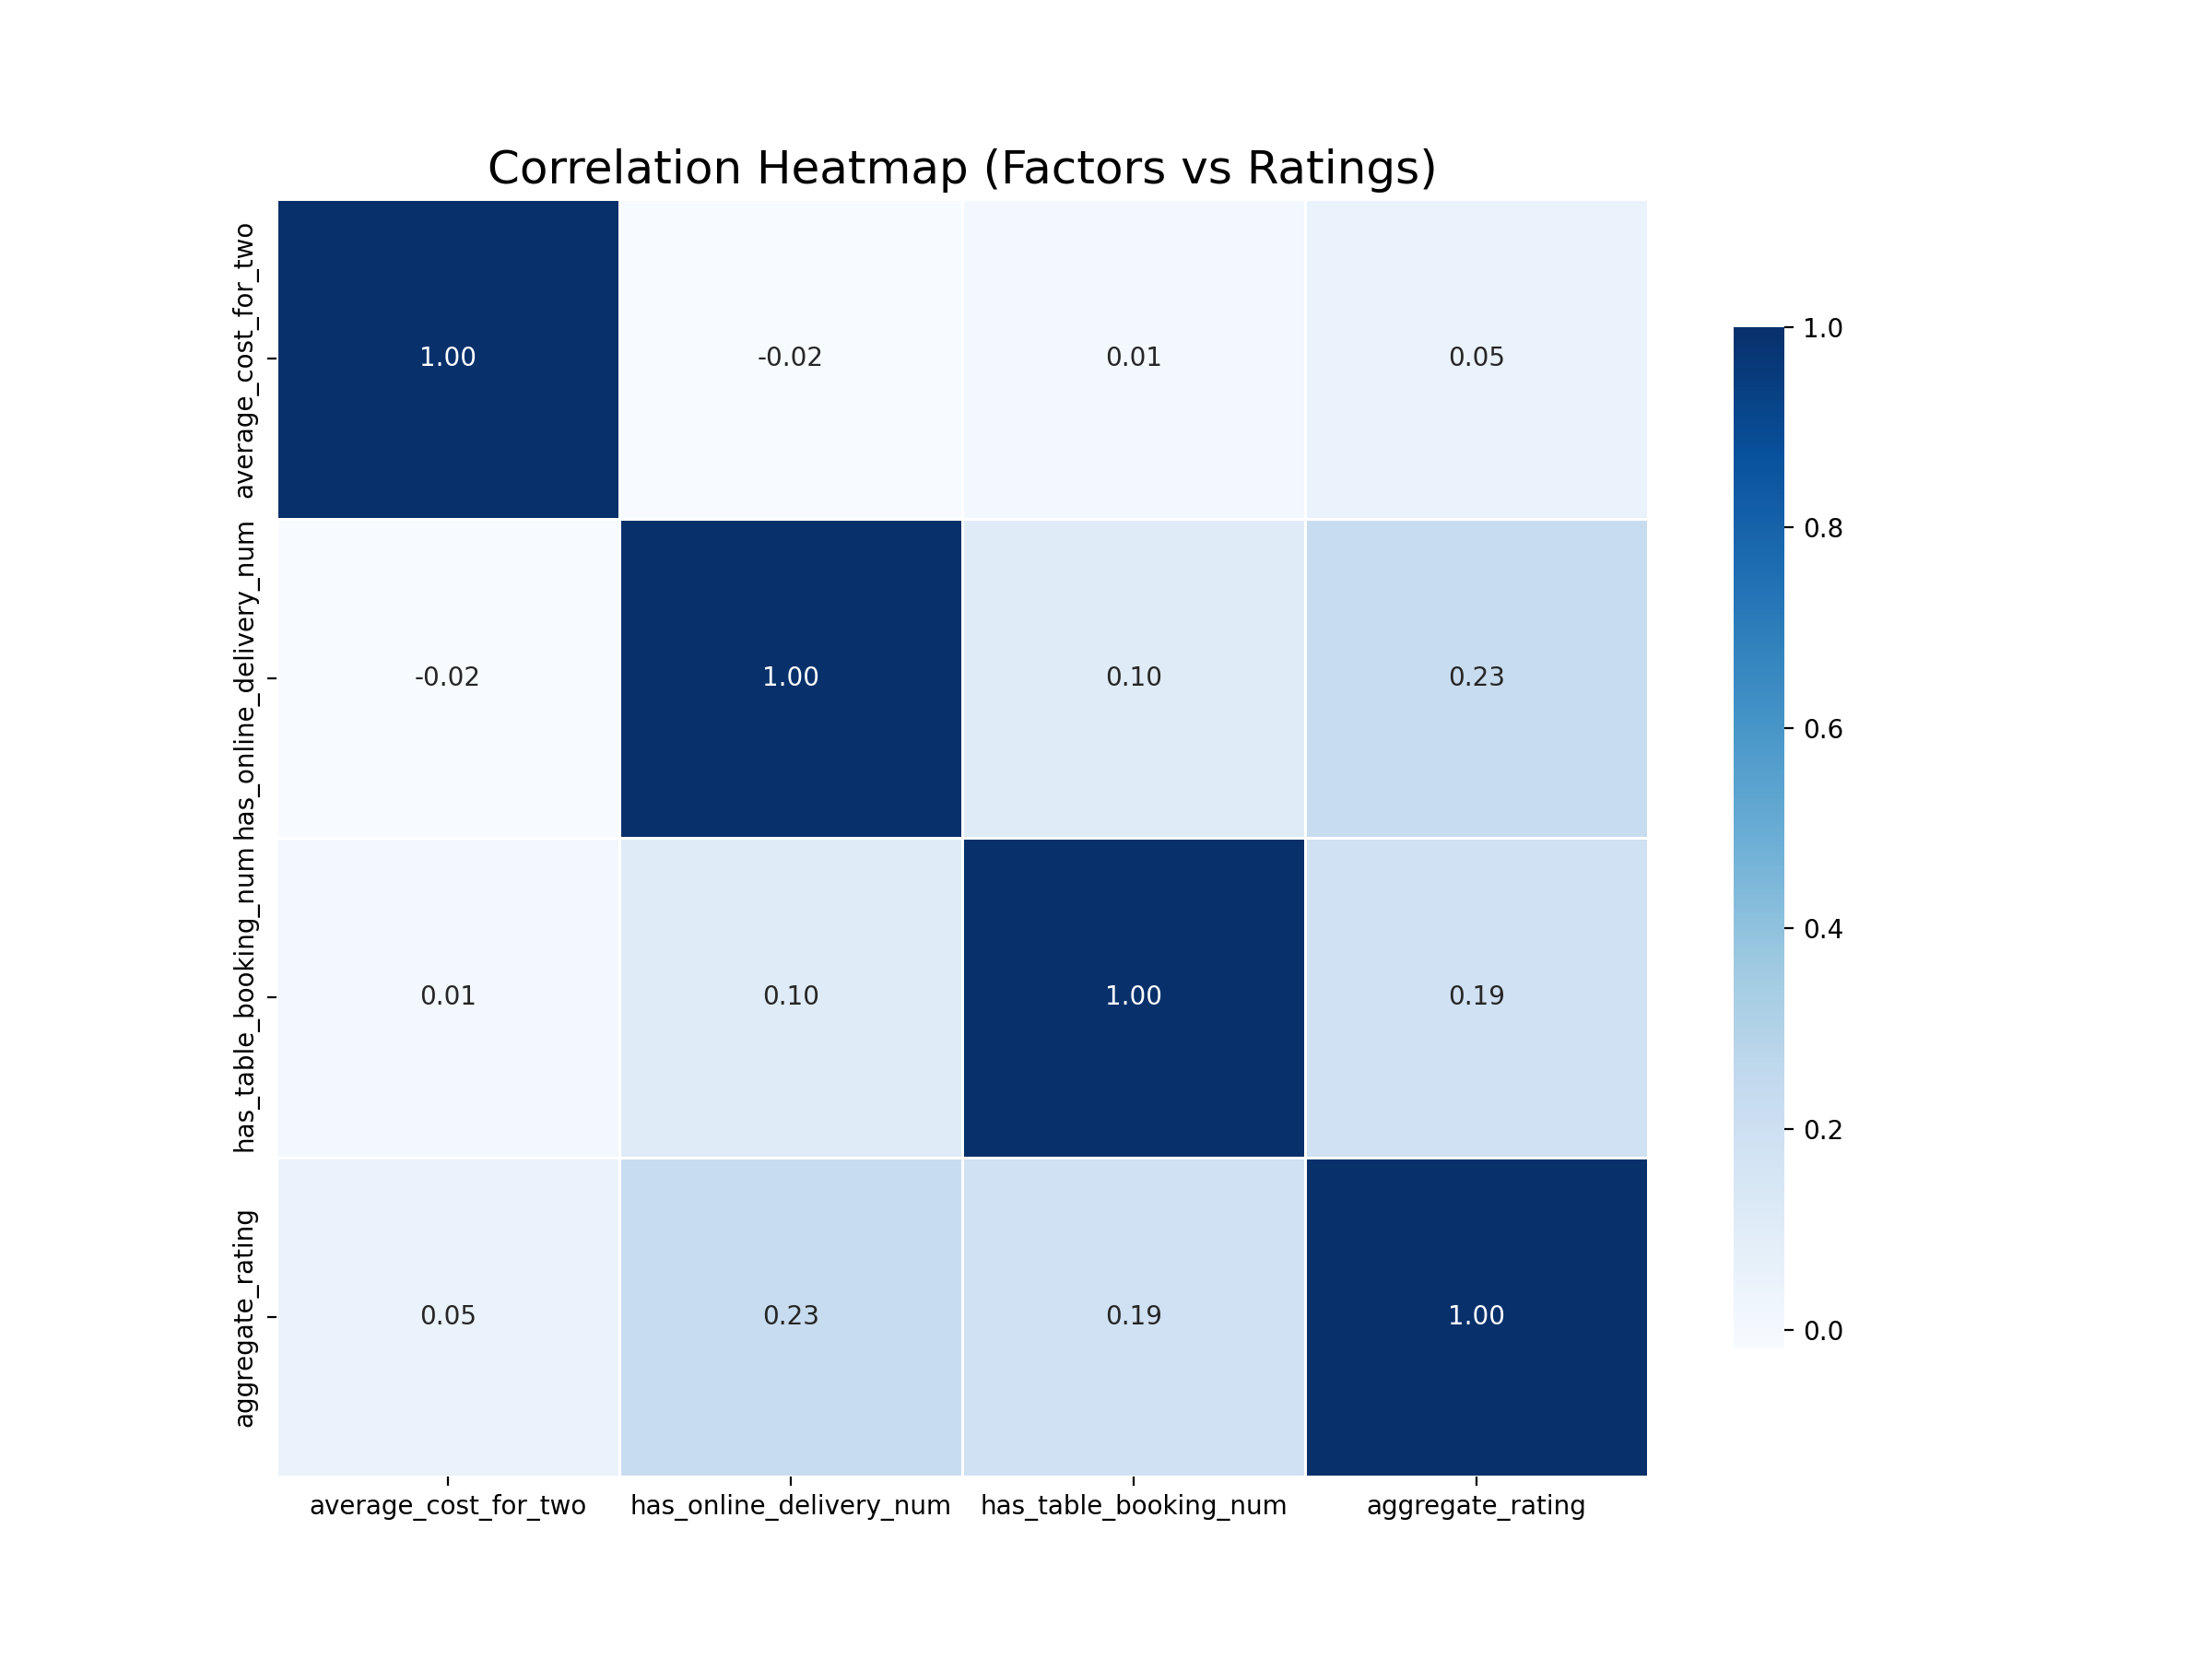

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64
from IPython.display import display, HTML

# Define the columns for the heatmap
cols = ['average_cost_for_two', 'has_online_delivery_num', 'has_table_booking_num', 'aggregate_rating']

# -------------------------
# 1️⃣ رسم الهيتماب مع حجم أكبر ودقة أعلى
fig, ax = plt.subplots(figsize=(12,9))   # حجم الهيتماب
sns.heatmap(df[cols].corr(),
            annot=True,
            cmap="Blues",
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={'shrink':0.8},
            ax=ax)
ax.set_title("Correlation Heatmap (Factors vs Ratings)", fontsize=18)

buf = BytesIO()
plt.savefig(buf, format="png", dpi=200)   # دقة أعلى للوضوح
plt.close(fig)
buf.seek(0)
heatmap_b64 = base64.b64encode(buf.read()).decode("utf-8")

# -------------------------
# 2️⃣ GIF URL
gif_url = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWc3c2pqcmdvbWZmYW92cGpzNHhxeXJtZGxyZTI1b3pueHZkcnA4eSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/XbLWKGZrOOR1ByhX7n/giphy.gif"

# -------------------------
# 3️⃣ HTML للعرض جنب بعض
display(HTML(f"""
<div style="display:flex; align-items:flex-start; gap:15px;">
    <div style="flex:1; text-align:center;">
        <img src="data:image/png;base64,{heatmap_b64}" style="max-width:100%; height:auto;">
    </div>
    <div style="flex:0.3; text-align:center;">
        <h3 style="color:#003366; font-family:Arial; font-size:16px; margin-bottom:10px;">
            Which factors (cost, online delivery, table booking) correlate most with higher ratings?
        </h3>
        <img src="{gif_url}" style="width:180px; height:180px; border-radius:8px;">
    </div>
</div>
"""))

**<span style="color:blue">Online delivery and table booking are more strongly associated with higher ratings than cost.</span>**


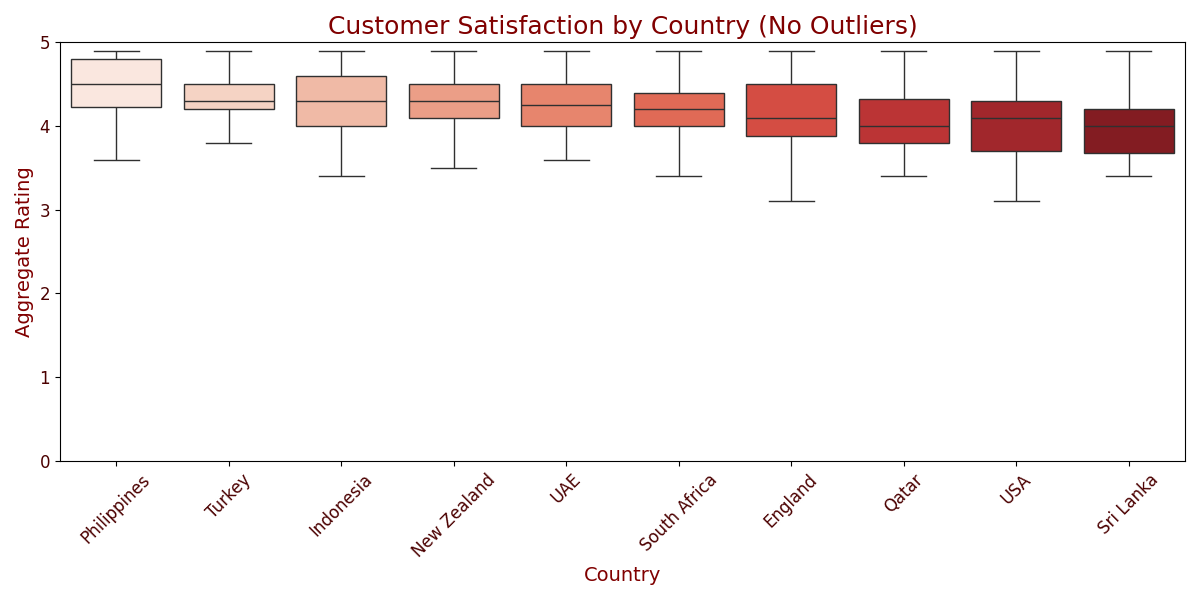

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from IPython.display import display, HTML

# 1️⃣ Top 10 countries by average rating
country_ratings = df.groupby('country')['aggregate_rating'].mean().reset_index()
country_ratings = country_ratings.sort_values('aggregate_rating', ascending=False).head(10)

# 2️⃣ Table styled with bigger width and red theme
table_html = country_ratings.style \
    .bar(subset=['aggregate_rating'], color='#FF7F7F', vmin=0, vmax=5) \
    .set_properties(**{
        'border': '1px solid #800000',
        'color': '#4B0000',
        'font-weight': 'bold',
        'text-align': 'center',
        'min-width':'400px',
        'font-size':'16px'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '16pt'),
                  ('background-color', '#800000'),
                  ('color', '#FFDADA'),
                  ('text-align', 'center')]
    }]).hide(axis="index").to_html()

# 3️⃣ Gif URL
gif_url = "https://media.giphy.com/media/YOMEtoDdlD9Ill5IWV/giphy.gif"

# 4️⃣ Boxplot (Top 10) bigger
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(
    data=df[df['country'].isin(country_ratings['country'])],
    x='country',
    y='aggregate_rating',
    palette='Reds',
    showfliers=False,
    order=country_ratings['country']
)
ax.set_title("Customer Satisfaction by Country (No Outliers)", fontsize=18, color='#800000')
ax.set_xlabel("Country", color='#800000', fontsize=14)
ax.set_ylabel("Aggregate Rating", color='#800000', fontsize=14)
ax.set_ylim(0,5)
plt.xticks(rotation=45, fontsize=12, color='#4B0000')
plt.yticks(fontsize=12, color='#4B0000')
buf = BytesIO()
plt.tight_layout()
plt.savefig(buf, format='png')
plt.close(fig)
buf.seek(0)
boxplot_b64 = base64.b64encode(buf.read()).decode('utf-8')

# 5️⃣ Display: bigger table + gif + boxplot
display(HTML(f"""
<div style="display:flex; flex-direction:row; align-items:center; justify-content:center; margin-bottom:20px;">
  <div style="flex:0.6; margin-right:10px;">
    {table_html}
  </div>
  <div style="flex:0.4; text-align:center;">
    <h2 style="color:#800000; font-family:Arial; font-size:20px; margin-bottom:20px;">
      Which countries have the highest customer satisfaction (average rating)?
    </h2>
    <img src="{gif_url}" style="width:250px; height:250px; border-radius:8px;">
  </div>
</div>

<div style="text-align:center; margin-top:20px;">
  <img src="data:image/png;base64,{boxplot_b64}" style="max-width:100%; height:auto;">
</div>
"""))



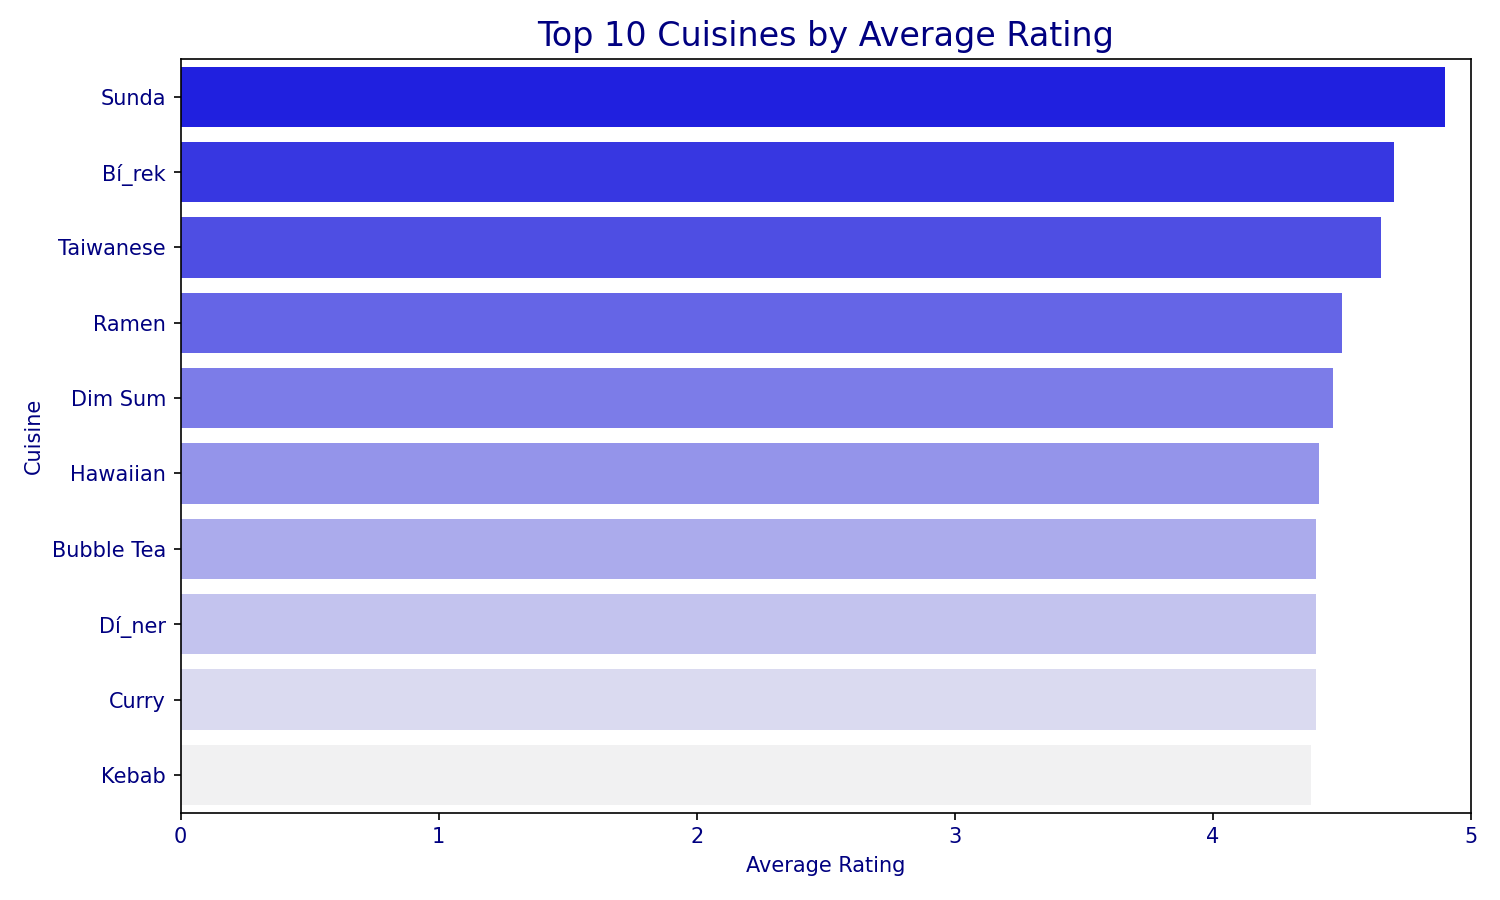

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from IPython.display import display, HTML

# -------------------------
# 1️⃣ تفكيك الـ cuisines بحيث كل نوع منفرد
df_exploded = df.assign(cuisine=df['cuisines'].str.split(', ')).explode('cuisine')

# -------------------------
# 2️⃣ حساب متوسط التقييم لكل cuisine (Top 10)
cuisine_ratings = df_exploded.groupby('cuisine')['aggregate_rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values('aggregate_rating', ascending=False).head(10)

# -------------------------
# 3️⃣ جدول ملون بتدرجات الأزرق والرمادي
table_html = cuisine_ratings.style \
    .bar(subset=['aggregate_rating'], color='#A9C6D9', vmin=0, vmax=5) \
    .set_properties(**{
        'border': '1px solid #808080',
        'color': '#000000',
        'font-weight': 'bold',
        'text-align': 'center',
        'min-width':'300px'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '12pt'),
                  ('background-color', '#808080'),
                  ('color', '#FFFFFF'),
                  ('text-align', 'center')]
    }]).hide(axis="index").to_html()

# -------------------------
# 4️⃣ GIF URL
gif_url = "https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3dzF1MHU3dmd2a3FiaDRxaTVuZ21nOHd5eGpoa3c2cjdnMG5hYXdsbiZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/cLqgpaf3yFODwJBrRG/giphy.gif"

# -------------------------
# 5️⃣ Barplot ملون بتدرجات الأزرق والرمادي
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=cuisine_ratings,
    x='aggregate_rating',
    y='cuisine',
    palette=sns.light_palette("blue", reverse=True, n_colors=10)
)
ax.set_title("Top 10 Cuisines by Average Rating", fontsize=16, color='#000080')
ax.set_xlabel("Average Rating", color='#000080')
ax.set_ylabel("Cuisine", color='#000080')
ax.set_xlim(0,5)
plt.xticks(color='#000080')
plt.yticks(color='#000080')
plt.tight_layout()

# حفظ Barplot كBase64
buf = BytesIO()
plt.savefig(buf, format='png', dpi=150)
plt.close(fig)
buf.seek(0)
barplot_b64 = base64.b64encode(buf.read()).decode('utf-8')

# -------------------------
# 6️⃣ عرض: جدول + GIF جنب بعض، Barplot تحتهم
display(HTML(f"""
<div style="display:flex; flex-direction:row; align-items:center; justify-content:center; gap:15px; margin-bottom:10px;">
  <div style="flex:0.6; margin-right:10px;">
    {table_html}
  </div>
  <div style="flex:0.4; text-align:center;">
    <h2 style="color:#000080; font-family:Arial; font-size:14px; margin-bottom:15px;">
      Which cuisines are consistently associated with higher ratings?
    </h2>
    <img src="{gif_url}" style="width:180px; height:180px; border-radius:8px;">
  </div>
</div>

<div style="text-align:center; margin-top:10px;">
  <img src="data:image/png;base64,{barplot_b64}" style="max-width:90%; height:auto;">
</div>
"""))


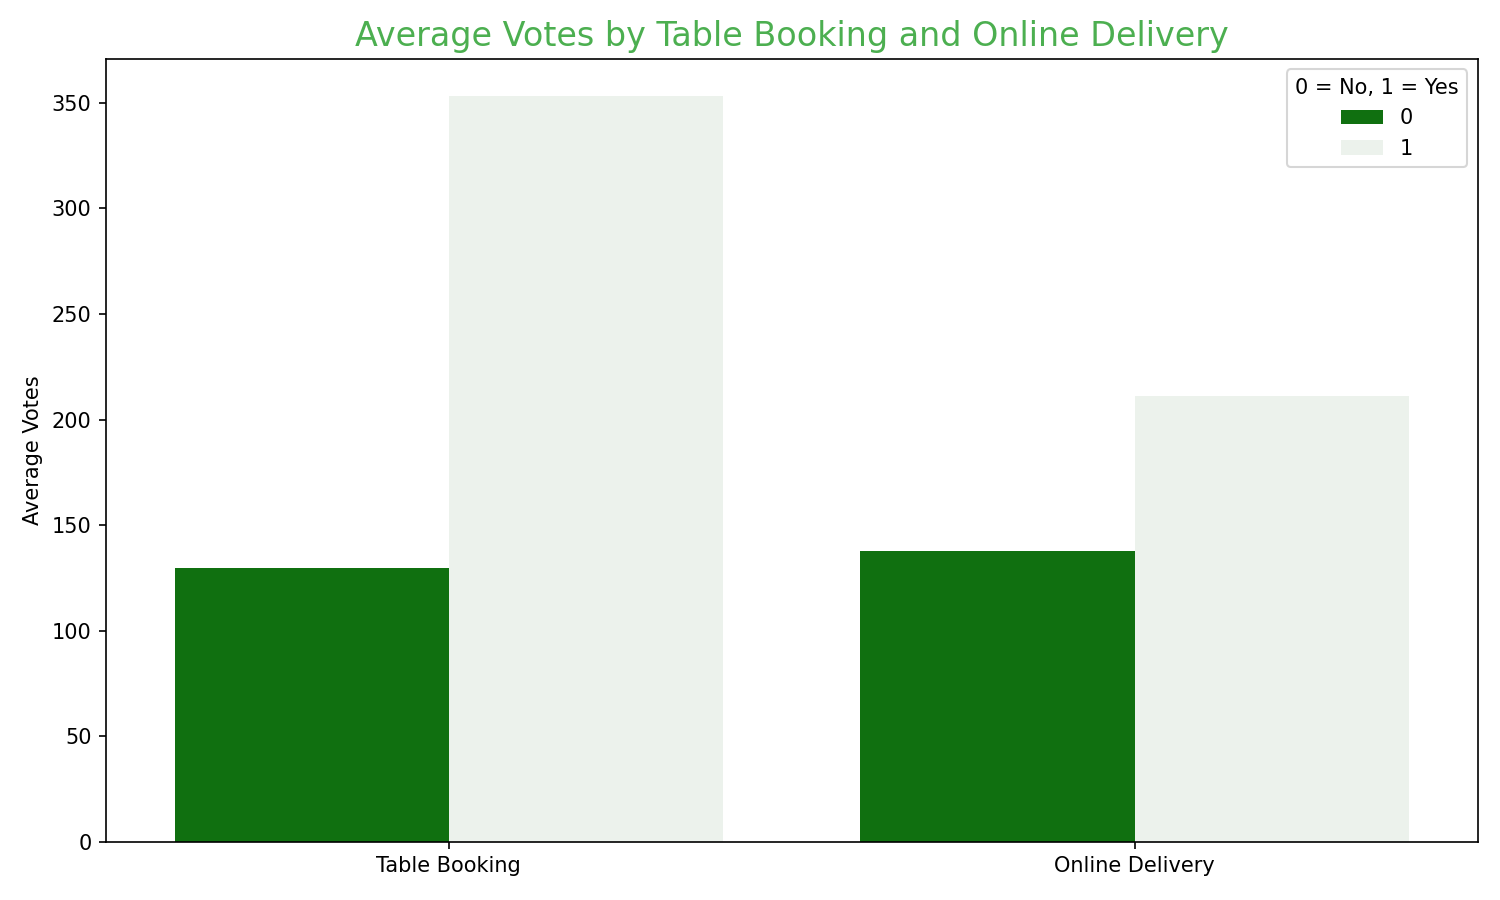

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from IPython.display import display, HTML

# -------------------------
# 1️⃣ حساب متوسط الأصوات لكل من "Table Booking" و "Online Delivery"
avg_votes_table = df.groupby('has_table_booking_num')['votes'].mean().reset_index()
avg_votes_online = df.groupby('has_online_delivery_num')['votes'].mean().reset_index()

# -------------------------
# 2️⃣ دمج البيانات لسهولة العرض
avg_votes_table['Feature'] = 'Table Booking'
avg_votes_table.rename(columns={'has_table_booking_num':'Value', 'votes':'Average Votes'}, inplace=True)

avg_votes_online['Feature'] = 'Online Delivery'
avg_votes_online.rename(columns={'has_online_delivery_num':'Value', 'votes':'Average Votes'}, inplace=True)

plot_data = pd.concat([avg_votes_table, avg_votes_online], ignore_index=True)

# -------------------------
# 3️⃣ جدول ملون بتدرجات الأخضر والبرتقالي
table_html = plot_data.style \
    .bar(subset=['Average Votes'], color=['#A9E2A1', '#FFB84D'], vmin=0, vmax=5) \
    .set_properties(**{
        'border': '1px solid #808080',
        'color': '#000000',
        'font-weight': 'bold',
        'text-align': 'center',
        'min-width':'300px'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '12pt'),
                  ('background-color', '#4CAF50'),
                  ('color', '#FFFFFF'),
                  ('text-align', 'center')]
    }]).hide(axis="index").to_html()

# -------------------------
# 4️⃣ GIF URL
gif_url = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNDU5ZG1yNHpmbTM5N2ZleGk3czZ4aWV1bzkyYmZnNmtwcXQzN2ZnZiZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/3ohhwEVKBOZd7bCQ7u/giphy.gif"

# -------------------------
# 5️⃣ Barplot ملون بتدرجات الأخضر والبرتقالي
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(
    data=plot_data,
    x='Feature',
    y='Average Votes',
    hue='Value',
    palette=sns.light_palette("green", reverse=True, n_colors=2)
)
ax.set_title("Average Votes by Table Booking and Online Delivery", fontsize=16, color='#4CAF50')
ax.set_xlabel('')
ax.set_ylabel('Average Votes')
ax.legend(title='0 = No, 1 = Yes')
plt.tight_layout()

# حفظ Barplot كBase64
buf = BytesIO()
plt.savefig(buf, format='png', dpi=150)
plt.close(fig)
buf.seek(0)
barplot_b64 = base64.b64encode(buf.read()).decode('utf-8')

# -------------------------
# 6️⃣ عرض: العنوان فوق GIF، الجدول بجانبه، Barplot تحتهم
display(HTML(f"""
<div style="display:flex; flex-direction:row; align-items:center; justify-content:center; gap:15px; margin-bottom:10px;">
  <div style="flex:0.6; margin-right:10px;">
    {table_html}
  </div>
  <div style="flex:0.4; text-align:center;">
    <h2 style="color:#4CAF50; font-family:Arial; font-size:14px; margin-bottom:5px;">
      Do restaurants with table booking or online delivery have higher average votes?
    </h2>
    <img src="{gif_url}" style="width:180px; height:180px; border-radius:8px;">
  </div>
</div>

<div style="text-align:center; margin-top:10px;">
  <img src="data:image/png;base64,{barplot_b64}" style="max-width:90%; height:auto;">
</div>
"""))



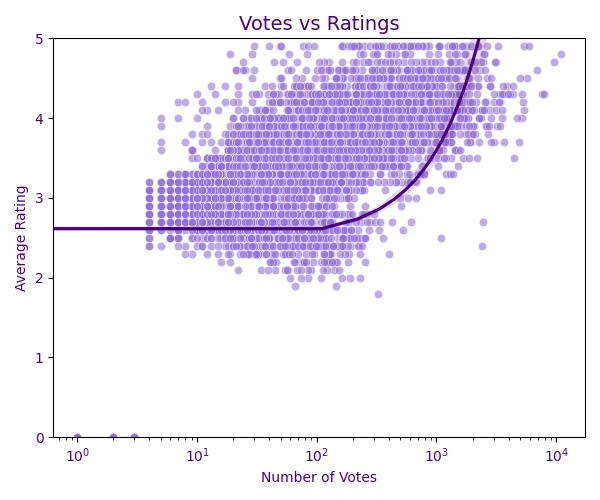

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import BytesIO
import base64
from IPython.display import display, HTML

# -------------------------
# 1️⃣ إعداد الجدول: متوسط التقييم حسب الحجز والتوصيل
votes_table = df.groupby(['has_table_booking_num', 'has_online_delivery_num'])['votes'].mean().reset_index()
votes_table = votes_table.rename(columns={
    'has_table_booking_num': 'Table Booking',
    'has_online_delivery_num': 'Online Delivery',
    'votes': 'Average Votes'
})

# تحويل الجدول إلى HTML ملون بدرجات البنفسجي
table_html = votes_table.style \
    .bar(subset=['Average Votes'], color='#9370DB', vmin=votes_table['Average Votes'].min(), vmax=votes_table['Average Votes'].max()) \
    .set_properties(**{
        'border': '1px solid #4B0082',
        'color': '#4B0082',
        'font-weight': 'bold',
        'text-align': 'center',
        'min-width':'200px'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('font-size', '12pt'),
                  ('background-color', '#4B0082'),
                  ('color', '#E6E6FA'),
                  ('text-align', 'center')]
    }]).hide(axis="index").to_html()

# -------------------------
# 2️⃣ رسم scatter plot للـ votes vs aggregate_rating بالبنفسجي
fig, ax = plt.subplots(figsize=(6,5))
sns.scatterplot(data=df, x='votes', y='aggregate_rating', alpha=0.6, color='#9370DB')
sns.regplot(data=df, x='votes', y='aggregate_rating', scatter=False, color='#4B0082')
ax.set_title("Votes vs Ratings", fontsize=14, color='#4B0082')
ax.set_xlabel("Number of Votes", color='#4B0082')
ax.set_ylabel("Average Rating", color='#4B0082')
ax.set_ylim(0,5)
ax.set_xscale('log')  # لتحسين التمثيل إذا كان التوزيع متباين
plt.xticks(color='#4B0082')
plt.yticks(color='#4B0082')
buf = BytesIO()
plt.tight_layout()
plt.savefig(buf, format='png')
plt.close(fig)
buf.seek(0)
scatter_b64 = base64.b64encode(buf.read()).decode('utf-8')

# -------------------------
# 3️⃣ GIF
gif_url = "https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExa3F5cHA5aHBmOTdtdG5kMWk2Njh4b2xwZGZ2ZzRwMjVjZWdwY3BpYSZlcD12MV9zdGlja2Vyc19zZWFyY2gmY3Q9cw/Q8TlZx35X6xDdJidvT/giphy.gif"

# -------------------------
# 4️⃣ عرض HTML: الجدول + GIF في صف، Scatter Plot تحتهم
display(HTML(f"""
<div style="display:flex; flex-direction:row; align-items:center; justify-content:center; gap:15px; margin-bottom:15px;">
  <div style="flex:0.5;">
    {table_html}
  </div>
  <div style="flex:0.5; text-align:center;">
    <h3 style="color:#4B0082; font-family:Arial; font-size:14px; margin-bottom:10px;">
      Do restaurants with table booking or online delivery have higher average votes?
    </h3>
    <img src="{gif_url}" style="width:180px; height:180px; border-radius:8px;">
  </div>
</div>

<div style="text-align:center; margin-top:15px;">
  <img src="data:image/png;base64,{scatter_b64}" style="max-width:80%; height:auto;">
</div>
"""))


  <div>
    <img src="https://media.giphy.com/media/v1.Y2lkPWVjZjA1ZTQ3NG9pNWJrMWl1bnppbjNrNWkxdjEwN2l1OGJwcHFscXI4YjJjamNzMCZlcD12MV9zdGlja2Vyc19yZWxhdGVkJmN0PXM/3LdRRtFdKccpPvHcWt/giphy.gif" alt="Zomato GIF" style="width: 200px; height: auto; border-radius: 8px;">
  </div>